## Logistic Regression Agenda

  * Attempt to use linear regression for classification
  * Logistic regression is a better alternative for classification
  * Brief overview of probability, odds, e, log, and log-odds
  * What is the logistic regression model?
  * Interpreting logistic regression coefficients
  * Compare logistic regression with other models
  
By the end of this portion of the class you will be able to:
  * Use logistic regression for a classification problem in the future
  * interpret the coefficients of a trained logistic regression model

### Predicting a categorical response

In the first part of today's lesson, we were attempting to predict a **continuous response**. However, what we want to do now is see if we can apply the same sort of logic to predict an outcome that has only 2 distinct possibilities, or what is known as a **categorical response.**

In machine learning parlance, we looked at **regression** when we were using linear regression, but we are now going to try to use the same approach for what is known as a **classification** problem (problems with only a discrete, finite number of outcomes; in our case, just 2).

As always, we are going to import all of the functionality we need before we get started:

In [21]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

This dataset contains 6 biomechanical features used to classify orthopaedic patients into 2 classes - normal and abnormal:
  * pelvic incidence
  * pelvic tilt
  * lumbar lordosis angle
  * sacral slope
  * pelvic radius
  * grade of spondylolisthesis
  
Lets load the data in:

In [22]:
vertebral_data = pd.read_csv("https://s3-us-west-1.amazonaws.com/linkedin-metis/vertebral_train.csv")
vertebral_data.head()

,pelvic_incidence pelvic_tilt lumbar_lordosis_angle sacral_slope pelvic_radius spondy_grade outcome outcome_number
0,84.97 33.02 60.86 51.95 125.66 74.33 AB 1
1,40.25 13.92 25.12 26.33 130.33 2.23 AB 1
2,79.25 23.94 40.8 55.3 98.62 36.71 AB 1
3,56.56 8.96 52.58 47.6 98.78 50.7 AB 1
4,80.82 19.24 61.64 61.58 89.47 44.17 AB 1


### Exercise

Ah, this wouldn't be a data science class without a CSV that was tricky to read in. Try using the following to look at a "raw text" version of the file:

```python
import requests as r
resp = r.get(filename)
print(resp.text)
```

Then, read the Pandas [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) documentation to figure out how to read in this file.

In [23]:
# YOUR CODE HERE

In [24]:
vertebral_data = pd.read_csv("https://s3-us-west-1.amazonaws.com/linkedin-metis/vertebral_train.csv", sep=" ")
vertebral_data.outcome.value_counts()

AB    157
NO     75
Name: outcome, dtype: int64

In order to use linear regression for this task, we have to convert our **categorical** target into a number:

In [25]:
vertebral_data["outcome_number"] = (vertebral_data.outcome=='AB').astype(int)
vertebral_data.outcome_number.value_counts()

1    157
0     75
Name: outcome_number, dtype: int64

Cool, so now our outcome is no longer a value, but a number. Let's plot `pelvic_incidence` relative to this new numeric `outcome_number`:

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


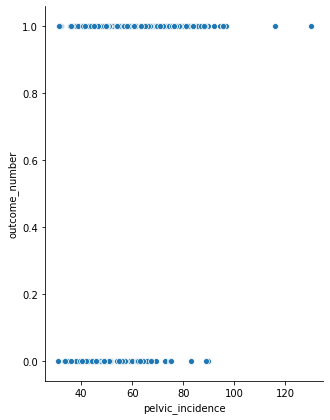

In [26]:
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence"],y_vars="outcome_number", size=6, aspect=0.8)

And now lets do a simple linear regression on that feature like we did before:

In [27]:
# fit a linear regression model and store the predictions
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)

**Note:** Here, we are just trying to determine what the best cutoff for classifying the vertebral data as class 0 or 1, not the accuracy of such a model, so we want to use all available data rather than splitting into a training set and a testing set.

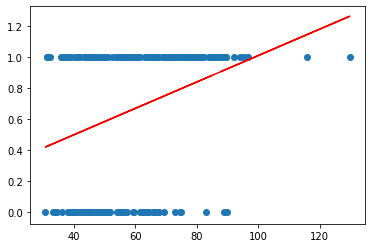

In [28]:
# scatter plot that includes the regression line
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred, color='red');

Lets examine the predictions:

In [29]:
outcome_pred[:10]

array([0.88222046, 0.50040606, 0.83338373, 0.63965903, 0.84678822,
       0.66194292, 0.69489917, 0.59748185, 0.71820761, 0.60431217])

If **pelvic_incidence=35**, what class do we predict for outcome? **0**

So, we predict the 0 class for **lower** values of `pelvic_incidence`, and the 1 class for **higher** values of `pelvic_incidence`. What's our cutoff value? Around **pelvic_incidence=45**, because that's where the linear regression line crosses the midpoint (0.5) between predicting class 0 and class 1.

So, we'll say that if **outcome_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [30]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(outcome_pred >= .5, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 0.5, 1, 0)
outcome_pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

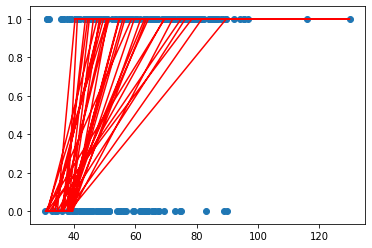

In [32]:
# plot the class predictions
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class, color='red');

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [33]:
# add predicted class to DataFrame
vertebral_data['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort_values('pelvic_incidence', inplace=True)

### Use Logistic Regression Instead of Linear Regression on Categorical Outcome Variables

Logistic regression can do exactly what we just did:

[`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation

In [34]:
logreg = LogisticRegression(C=1e9)
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
logreg.fit(X, y)
outcome_pred_class_log = logreg.predict(X)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

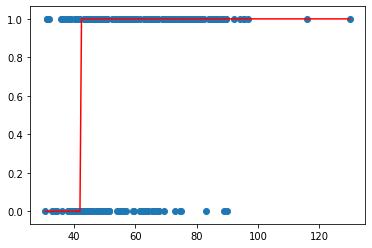

In [36]:
# plot the class predictions
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class_log, color='red');

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [37]:
# store the predicted probabilites of class 1
outcome_probs = logreg.predict_proba(X)[:, 1]

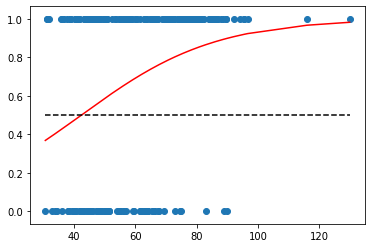

In [38]:
# plot the predicted probabilities, and the 50% line
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')
plt.plot(vertebral_data.pelvic_incidence,np.ones(outcome_probs.shape)*.5,'k--');

In [39]:
# examine some example predictions
print("Pelvic incidence of 15:", logreg.predict_proba([[15]]))
print("Pelvic incidence of 10:", logreg.predict_proba([[10]]))
print("Pelvic incidence of 55:", logreg.predict_proba([[55]]))

Pelvic incidence of 15: [[0.77976788 0.22023212]]
Pelvic incidence of 10: [[0.81674428 0.18325572]]
Pelvic incidence of 55: [[0.35968757 0.64031243]]


What are these numbers? 

The first number in each entry indicates the predicted probability of **class 0**, and the second number in each entry indicates the predicted probability of **class 1**.

### Review: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [40]:
# create a table of probability versus odds
prob_table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]})
prob_table['odds'] = prob_table.probability/(1 - prob_table.probability)
prob_table

,probability,odds
0,0.100,0.111111
1,0.200,0.250000
2,0.250,0.333333
3,0.300,0.428571
4,0.400,0.666667
5,0.500,1.000000
6,0.600,1.500000
7,0.700,2.333333
8,0.800,4.000000
9,0.900,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [41]:
# exponential function: e^1
np.exp(1)

2.718281828459045

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth ([wiki](https://en.wikipedia.org/wiki/Natural_logarithm)):

In [42]:
# time needed to grow 1 unit to 2.718 units
np.log(np.exp(1))

1.0

It is also the **inverse** of the exponential function ([review your properties of logarithms here](http://www.purplemath.com/modules/logrules.htm)):

In [43]:
np.log(np.exp(5))

5.0

In [44]:
# add log-odds to the table
prob_table['log_odds'] = np.log(prob_table.odds)
prob_table

,probability,odds,log_odds
0,0.100,0.111111,-2.197225
1,0.200,0.250000,-1.386294
2,0.250,0.333333,-1.098612
3,0.300,0.428571,-0.847298
4,0.400,0.666667,-0.405465
5,0.500,1.000000,0.000000
6,0.600,1.500000,0.405465
7,0.700,2.333333,0.847298
8,0.800,4.000000,1.386294
9,0.900,9.000000,2.197225


### Ok, but what is logistic regression?

[**Linear regression:**](https://en.wikipedia.org/wiki/Linear_regression) continuous response is modeled as a linear combination of the features used :

$$y = \beta_0 + \beta_1x + ... \beta_nx$$

[**Logistic regression:**](https://en.wikipedia.org/wiki/Logistic_regression) log-odds of a categorical response being "true" (or the number 1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x + ... \beta_nx$$

This is called the [**logit function**](https://en.wikipedia.org/wiki/Logit).

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x + ... \beta_nx$$

The equation can be rearranged into the [**logistic function**](https://en.wikipedia.org/wiki/Logistic_function):

$$\pi = \frac{e^{\beta_0 + \beta_1x + ... + \beta_nx}} {1 + e^{\beta_0 + \beta_1x + ... + \beta_nx}}$$

Here's what that looks like:

![logistic curve](./images/logistic_curve.png)

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**:

$f(x)= 
\begin{cases}
    1,& \text{if } p\geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

The **logistic function** has some nice properties:

- Takes on an "s" shape (which allows it to be differentiable, a really important math property for functions to have)
- Output is bounded by 0 and 1

Some things to note:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data. We do this using fancy math involving taking derivatives, and thats why that S-shaped curve is so important.

### Interpreting Logistic Regression Coefficients

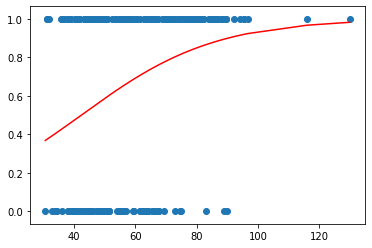

In [45]:
# plot the predicted probabilities again
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red');

In [46]:
# compute predicted log-odds for pelvic_incidence=55 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 55
print("Log odds:",logodds)

Log odds: [0.57672042]


In [47]:
# convert log-odds to odds
odds = np.exp(logodds)
print("odds:",odds)

odds: [1.78019057]


In [48]:
# convert odds to probability, this is the number you would see in the plot above where x= 55
prob = odds/(1 + odds)
print("probability:",prob)

probability: [0.64031243]


In [49]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba([[55]])[:, 1]

array([0.64031243])

In [50]:
# examine the coefficient for al
dict(zip(feature_cols, logreg.coef_[0]))

{'pelvic_incidence': 0.04602586491752126}

**Interpretation:** A 1 unit increase in `pelvic_incidence` is associated with a ~0.046 unit increase in the log-odds of `outcome`, where a positive outcome is having a vertebral abnormality (not positive in the real world, but positive in how we coded our outcome feature).

In [51]:
# increasing pelvic_incidence by 1 (so that pelvic_incidence=56) increases the log-odds by about 0.046
logodds = 0.57672042 + 0.04602586491752126
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.6508428902422486

In [52]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba([[56]])[:, 1]

array([0.65084289])

### What does this mean actually? 

**Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).**

In [53]:
# examine the intercept
logreg.intercept_

array([-1.95470215])

**Interpretation:** For a 'pelvic_incidence' value of 0, the log-odds of 'outcome' is -1.95.

In [54]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.12404154])

That makes sense from the plot above, because the probability of outcome=1 should be very low for such a low `pelvic_incidence` value.

![logistic betas example](./images/logistic_betas_example.png)

### How do we measure model performance for classification problems?

Now that we have a trained model just as we did before with linear regression, what is our **evaluation metric/loss function**?

There are two common (inverse) measurements we can make that capture the performance of our classification model:
  * **Classification accuracy**: percentage of correct predictions (**reward function**)
  * **Classification error**: percentage of incorrect predictions (**loss function**)

In our case, we are going to use classification accuracy. Let's compute our classification accuracy after training on the whole dataset, using our just-trained one-feature model and the scikit-learn method `accuracy_score`:

In [55]:
y = vertebral_data.outcome_number
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

Model accuracy: 0.6120689655172413


61% is ok, but its not really fantastic. Can we do better? (YES WE CAN!)

### Exercise
  * Generate the logistic regression model incorporating all of the features we have available to predict `outcome_number` and get the accuracy when training and testing on all data. How much better is this than the case where we trained our model using only `pelvic_incidence`?
  * Use train/test split with 70% training, 30% testing and get the test error of the model trained on all features using `train_test_split` like we did during linear regression 
  * Inspect all of the model coefficients of the model trained on all features. Which feature is the most important for the prediction? Which is the least important?
  * What are some problems you can see in using the data like we have been? (Look at the fraction of positive and negative outcomes in the dataset)

### Train test split concept for classification data

For classification data problems we want to used "stratified" train-test split: ensuring that the proportion of observations across the classes is even across the training and testing set:

In [56]:
from sklearn.model_selection import train_test_split

y_col = "outcome_number"
X = vertebral_data.drop(y_col, axis=1)
y = vertebral_data[y_col]

Compare the out ome of the following two train-test splits:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=72018)

In [58]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.637931
0    0.362069
Name: outcome_number, dtype: float64
1    0.793103
0    0.206897
Name: outcome_number, dtype: float64


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=72018, 
                                                    stratify=y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.678161
0    0.321839
Name: outcome_number, dtype: float64
1    0.672414
0    0.327586
Name: outcome_number, dtype: float64


In [60]:
pass # your code here

### Comparing Logistic Regression with Other Models

Logistic regression has some really awesome advantages:

  * It is a highly interpretable method (if you remember what the conversions from log-odds to probability are)
  * Model training and prediction are fast
  * No tuning is required (excluding regularization, which we will talk about later)
  * No need to scale features
  * Outputs well-calibrated predicted probabilities (the probabilities behave like probabilities)

However, logistic regression also has some disadvantages:

  * It presumes a linear relationship between the features and the log-odds of the response
  * Compared to other, more fancypants modeling approaches, performance is (generally) not competitive with the best supervised learning methods
  * Like linear regression for regression, it is sensitive to irrelevant features
  * Unless you explicitly code them (we will see how to do that later), logistic regression can't automatically learn feature interactions

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

The non-bias $\beta$ coefficients are effectively estimates of how certain you are of the outcome given how much evidence that specific feature gives you. A really high magnitude (positive or negative) value means you are very certain of the outcome, given you know that feature's value.

### Exercise (rest of day)

**All the same tricks we learned with linear regression work with logistic regression as well!**

* Standardizing your features produces more comparable coefficients
* Regularization is implemented the same way and has the same interpretation: more regularization reduces model complexity/capacity and vice versa.

With that said: 

**Try to build the best logistic regression model you can on the vertebral data**. I encourage you to use the cross validation functions from the prior lesson to compare models.

I'll give you the testing data roughly 15 minutes before the end of class.